In [2]:
import sys
sys.path.append('/Users/zhengj10/Python/Modules')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tifffile as tff
import os
from glob import glob
from registration import CrossCorr
import yaml
import PatcherBot as pb


In [3]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',

                              'Parrot', 'Parrot'],

                   'Max Speed': [380., 370., 24., 26.]})

df




,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [6]:
df.groupby(['Animal']).mean()


,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


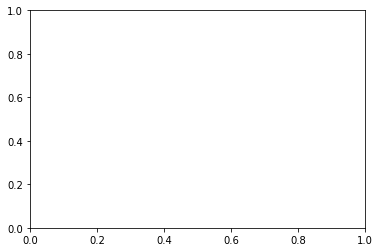

In [9]:
ax = plt.subplot(111)

In [11]:
plt.errorbar?

### Pipette accuracy

In [3]:
data_file = '/Users/zhengj10/Desktop/GENIE/Meeting/GENIE data/200303/Material/auto_calibration.xlsx'


In [4]:
df = pd.read_excel(data_file)
df

,Pipette,X,Y,Z,XY,Stage,Tester,c
0,1,-0.32,-2.79,-0.75,2.81,1.81,Jihong,#1f77b4
1,1,0.65,-1.30,1.84,1.46,0.32,NaN,#1f77b4
2,1,-0.15,-0.42,2.94,0.45,0.34,NaN,#1f77b4
3,1,-1.86,-1.01,2.63,2.11,0.05,NaN,#1f77b4
4,1,0.33,0.33,-0.75,0.47,0.10,NaN,#1f77b4
...,...,...,...,...,...,...,...,...
113,2,1.44,1.22,-2.76,1.89,0.21,NaN,#ff7f0e
114,2,0.21,-0.33,-4.12,0.39,1.12,NaN,#ff7f0e
115,2,-0.28,1.10,-3.89,1.13,0.06,NaN,#ff7f0e
116,2,0.46,3.30,-1.02,3.33,0.61,NaN,#ff7f0e


In [18]:
params = ['X','Y','Z','XY']
# params = ['X']

- Swamplot + boxplot of pipette shift in each dimension

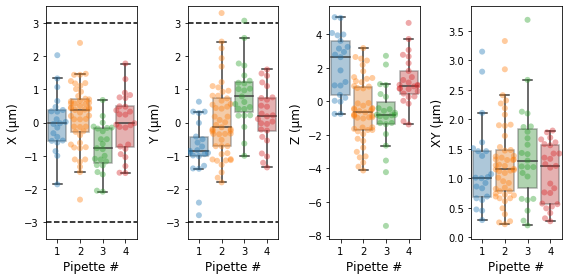

In [20]:
import unicodedata
fig = plt.figure(figsize = (8,4))
for counter, value in enumerate(params):
    ax  = fig.add_subplot(1,4,counter+1)
    sns.swarmplot(x="Pipette", y=value, data=df, ax = ax, size=6, dodge=True, alpha=0.4)
    sb = sns.boxplot(x="Pipette", y=value, data=df, ax = ax, boxprops=dict(alpha=0.4),showfliers=False)
    if value in['X','Y']:
        ax.hlines(3, xmin = -0.5, xmax=3.5, linestyle = '--')
        ax.hlines(-3, xmin = -0.5, xmax=3.5, linestyle = '--')
        ax.set_ylim(-3.5,3.5)
    ylabel = value + ' (\u03BCm)'
    ax.set_ylabel(ylabel,size=12)
    ax.set_xlabel('Pipette #',size=12)
#     ax.plot([-0.5,0.5],[-1,-1],color='m')
#     ax.plot([0.5,1.5],[1,1],color='k',linestyle='--')

    
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/auto_calibration.png',dpi=1200)
plt.show()


In [11]:
ax.get_xlim()

(-0.5, 3.5)

In [6]:
# fig = plt.figure(figsize = (12,6.5))
# from matplotlib import gridspec
# gs = gridspec.GridSpec(2, 4, height_ratios=[4,3]) 
# for counter, value in enumerate(params):
#     ax  = fig.add_subplot(gs[counter])
#     sns.swarmplot(x="Pipette", y=value, data=df, ax = ax, size=6, dodge=True, alpha=0.4)
#     sb = sns.boxplot(x="Pipette", y=value, data=df, ax = ax, boxprops=dict(alpha=0.4))

# x_values = []
# y_values = []

# for pipette in[1,2,3,4]:
#     df_pipette = df[df.Pipette == pipette]
#     x_value = np.sum(np.abs(df_pipette.X)>3)/df_pipette.X.count()
#     x_values.append(x_value)
#     y_value = np.sum(np.abs(df_pipette.Y)>3)/df_pipette.Y.count()
#     y_values.append(y_value)
# data_M7 = {'Pipette':[1,2,3,4], 'X':x_values, 'Y':y_values}
# df_M7 = pd.DataFrame(data=data_M7)

# ax1  = fig.add_subplot(gs[4])
# sns.barplot(x="Pipette", y='X', data=df_M7, ax = ax1, alpha=0.5)
# # ax1.set_ylim((0.0, 0.1826086956521739))
# ax1.hlines(0.3, xmin = -0.5, xmax=3.5, linestyle = '--')
# ax2  = fig.add_subplot(gs[5])
# sns.barplot(x="Pipette", y='Y', data=df_M7, ax = ax2, alpha=0.5)
# ax2.hlines(0.3, xmin = -0.5, xmax=3.5, linestyle = '--')
# plt.tight_layout()
# # fig.savefig('/Users/zhengj10/De/sktop/200107/auto_calibration.png', dpi=1200)
# plt.show()


- 3D scatter plot of all pipettes

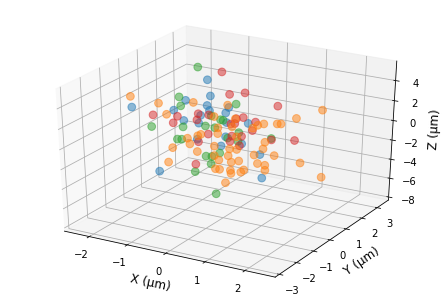

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
result = df
ax.scatter(result['X'], result['Y'], result['Z'], c = result['c'], s=60, alpha=0.5)
ax.set_xlabel("X (\u03BCm)",size=12)
ax.set_ylabel("Y (\u03BCm)",size=12)
ax.set_zlabel("Z (\u03BCm)",size=12)
# fig.savefig('/Users/zhengj10/Desktop/auto_calibration_3d.png', dpi=1200)
plt.show()


- 3D histogram for all pipettes

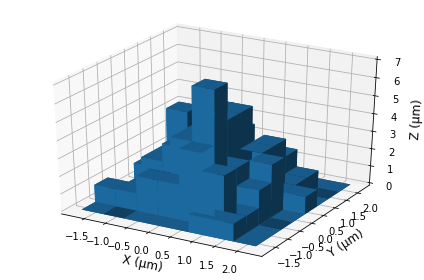

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = result.X.to_list()
y = result.Y.to_list()
hist, xedges, yedges = np.histogram2d(x, y, bins=8, range=[[-2, 2], [-2, 2]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_xlabel("X (\u03BCm)",size=12)
ax.set_ylabel("Y (\u03BCm)",size=12)
ax.set_zlabel("Z (\u03BCm)",size=12)
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/auto_calibration_hist.png', dpi=1200)
plt.show()


### Pipette detection power

- Compute cross correlation between pipette ref and cell image

In [9]:
data_path = '/Users/zhengj10/Desktop/GENIE/Meeting/GENIE data/200303/Material/Pipette_detection/2019.12.17_000/plate_000/'
os.path.exists(data_path)


True

- Registration of pipette image to one test imaging (pipette tip was not centered when taking pipette image)

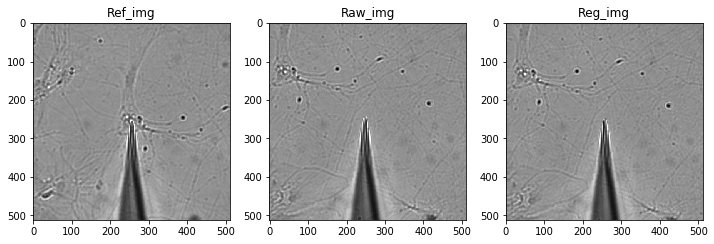

In [10]:
fig = plt.figure(figsize=[12,6])
ax1 = plt.subplot(131)
ref = data_path + 'image_001.tif'
tar = data_path + 'image_000.tif'
data = tff.TiffFile(ref)
data_ref = data.asarray()

ax1.imshow(data_ref, cmap='gray')
ax1.set_title('Ref_img')
ax2 = plt.subplot(132)
data = tff.TiffFile(tar)
data_tar = data.asarray()
ax2.imshow(data_tar, cmap='gray')
ax2.set_title('Raw_img')

algorithm = CrossCorr()
model = algorithm.fit(data_tar[200:500,200:300], data_ref[200:500,200:300])
registered = model.transform(data_tar)
registered = registered.toarray()

ax3 = plt.subplot(133)
ax3.imshow(registered, cmap='gray')
ax3.set_title('Reg_img')
# fig.savefig('/Users/zhengj10/Desktop/pipette.png',dpi=1200)
plt.show()


- Calculate correlation_coefficient

In [11]:
# Use registered pipette image as ref image for calculation of correlation_coefficients (no need for future)
data_ref = registered

In [12]:
tar_files = glob(data_path + '/*.tif')
tar_files = sorted(tar_files)


In [13]:
def correlation_coefficient(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    product /= stds
    return product
    

In [14]:
# def inverse_image(img):
#     img_inv = 65535 - img
#     return img_inv


In [15]:
correlation_coefficients = []
cell_no = []
pixel_values = []
for img in range(1,len(tar_files)):
    data = tff.TiffFile(tar_files[img])
    if img in [19,22]:
        continue
    data_tar = data.asarray()
    cc = correlation_coefficient(data_ref[200:400,226:286], data_tar[200:400,226:286])
    correlation_coefficients.append(cc)
    cell_no.append(img)
    pixel_value = np.mean(data_tar[200:400,226:286])
    pixel_values.append(pixel_value)
    

In [16]:
data = {'Cell':cell_no, 'Correlation_coefficient':correlation_coefficients, 'Pixel_val':pixel_values}
df_pipette = pd.DataFrame(data = data)


In [17]:
# success = np.ones(len(df_pipette))
df_pipette['Detected'] = 'Success'
# df_pipette


In [18]:
failed = [6,8,10,13,17,18,23,25,26,29,30,32,44,56,60,62]
for cell in(failed):
    df_pipette.loc[df_pipette.Cell == cell, 'Detected'] = 'Failed'
    

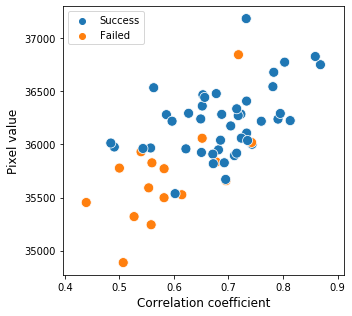

In [19]:
fig = plt.figure(figsize=[5,4.5])
ax  = fig.add_subplot(111)

s_scatter = sns.scatterplot(x='Correlation_coefficient', y='Pixel_val', hue='Detected', 
                            data=df_pipette, ax = ax, s=100)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:],loc='upper left')
ax.set_xlabel('Correlation coefficient',size=12)
ax.set_ylabel('Pixel value',size=12)
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/detection_results.png',dpi=1200)
plt.show()


In [20]:
cells_sel = [2,12,8,30]

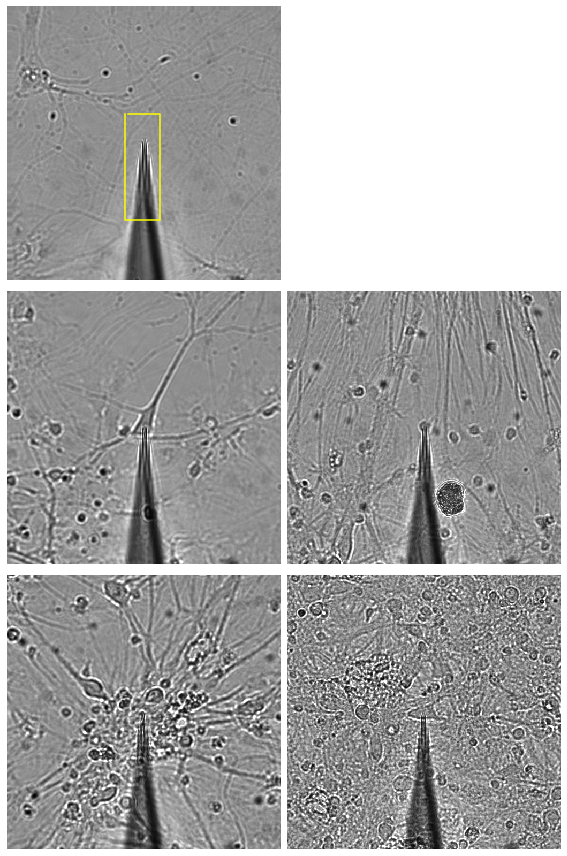

In [21]:
fig = plt.figure(figsize=[8,12])
ax = plt.subplot(3,2,1)
ax.imshow(registered, cmap='gray', vmin=5420, vmax=65535)
ax.plot([226,286,286,220,220],[200,200,400,400,200], color = 'yellow')
ax.axis('off')
subplot = 1
vmin = []
vmax = []
for cell in(cells_sel):
    ax = plt.subplot(3,2,subplot+2)
    img_file = data_path + '/image_' + str(cell).zfill(3) + '.tif'
    img_file = tff.TiffFile(img_file)
    img_file = img_file.asarray()
    vmin.append(np.min(img_file))
    vmax.append(np.max(img_file))
    ax.imshow(img_file, cmap='gray', vmin=5420, vmax=65535)
    ax.axis('off')
    subplot+=1
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/200107/sample_images.png')
plt.show()


In [22]:
# np.min(vmin), np.max(vmax)

In [23]:
correlation_coefficients[28]

0.5861809694925731

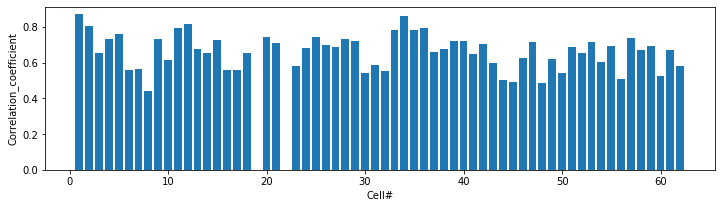

In [24]:
fig = plt.figure(figsize=[12,3])
plt.bar(cell_no,correlation_coefficients)
plt.xlabel('Cell#')
plt.ylabel('Correlation_coefficient')
plt.show()


### Pipette performance

In [25]:
def get_seal_time(logFile):
    important = []
    keep_phrases = ["cell detected", "gigaohm seal detected"]
    with open(logFile) as f:
        f = f.readlines()
    for line in f:
        for phrase in keep_phrases:
            if phrase in line:
                important.append(line)
                break
    seal_start = eval(important[0])
    seal_end = eval(important[1])
    seal_time = seal_end['event_time'] - seal_start['event_time'] - 5 # 5 sec sleep with pressure -1kpa
    return(seal_time)

In [26]:
# get_seal_time('/Volumes/Backup Plus/PatcherBot/raw/2020.09.24_000/plate_003/patch_attempt_0042_000/patch.log')

- Two pipettes one dishes

In [27]:
# platePath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw_pipette_performance/2020.01.22_000/plate_001'
platePath = 'Y:\\PatcherBot\\raw_pipette_performance\\2020.01.22_000\\plate_001'
cellPath = pb.getPathInfo(os.path.join(platePath))

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw_pipette_performance/2020.01.22_000/plate_001'

In [28]:
columns = ['Dish#','Cell','t_stamp','Success','Pipette#','Seal_time']
df_pp = pd.DataFrame(columns = columns) # pp: pipette performance

In [29]:
dish_no = []
t_stamp = []
Success = []
Pipette_no = []
Seal_time = []
for cell in(cellPath):
    dish_no.append('dish_1')
    idxFile = os.path.join(platePath, cell, '.index')
    meta = yaml.load(open(idxFile), Loader=yaml.FullLoader)
    t_stamp.append(meta['.']['__timestamp__'])
    dataPath = os.path.join(platePath, cell, 'camera_clamp1_000')
    if os.path.exists(dataPath):
        logFile = os.path.join(platePath, cell, 'patch.log')
        seal_time = get_seal_time(logFile)
        success = 1
        
    else:
        seal_time = 0
        success = 0
    Seal_time.append(seal_time)
    Success.append(success)
    if meta['.']['__timestamp__'] < 1579733982:
        pipette_no = 1
    else:
        pipette_no = 2
    Pipette_no.append(pipette_no)

NameError: name 'cellPath' is not defined

In [30]:
df_pp['Dish#'] = dish_no
df_pp['Cell'] = cellPath
df_pp['t_stamp'] = t_stamp
df_pp['Success'] = Success
df_pp['Pipette#'] = Pipette_no
df_pp['Seal_time'] = Seal_time
df_pp.sort_values(by=['t_stamp'],inplace=True)
df_pp


NameError: name 'cellPath' is not defined

In [ ]:
df_pp.to_excel('/Users/zhengj10/Desktop/Pipette_performance_two_pipettes_one_dish.xlsx')

- One pipettes two dishes

In [31]:
# platePath = ['/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw_pipette_performance/2020.01.23_000/plate_000',
#             '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw_pipette_performance/2020.01.23_000/plate_001']


platePath = ['Y:\\PatcherBot\\raw_pipette_performance\\2020.01.23_000\\plate_000',
            'Y:\\PatcherBot\\raw_pipette_performance\\2020.01.23_000\\plate_001']

In [32]:
columns = ['Dish#','Cell','t_stamp','Success','Pipette#','Seal_time']
df_pp = pd.DataFrame(columns = columns) # pp: pipette performance


In [33]:
dish_no = []
t_stamp = []
Success = []
Pipette_no = []
Seal_time = []
dish = 0
cell_no = []
for plate in(platePath):
    dish += 1
    cellPath = pb.getPathInfo(os.path.join(plate))

    for cell in(cellPath):
        cell_no.append(cell)

        if dish == 1:
            dish_no.append('dish_1')
        else:
            dish_no.append('dish_2')
        idxFile = os.path.join(plate, cell, '.index')
        meta = yaml.load(open(idxFile), Loader=yaml.FullLoader)
        t_stamp.append(meta['.']['__timestamp__'])
        dataPath = os.path.join(plate, cell, 'camera_clamp1_000')
        if os.path.exists(dataPath):
            logFile = os.path.join(plate, cell, 'patch.log')
            seal_time = get_seal_time(logFile)
            success = 1

        else:
            seal_time = 0
            success = 0
        Seal_time.append(seal_time)
        Success.append(success)
        pipette_no = 1
        Pipette_no.append(pipette_no)


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw_pipette_performance/2020.01.23_000/plate_000'

In [34]:
df_pp['Dish#'] = dish_no
df_pp['Cell'] = cell_no
df_pp['t_stamp'] = t_stamp
df_pp['Success'] = Success
df_pp['Pipette#'] = Pipette_no
df_pp['Seal_time'] = Seal_time
df_pp.sort_values(by=['t_stamp'],inplace=True)
df_pp.index = np.arange(1,len(df_pp)+1)
df_pp


,Dish#,Cell,t_stamp,Success,Pipette#,Seal_time


In [35]:
# df_pp.to_excel('/Users/zhengj10/Desktop/Pipette_performance_one_pipette_two_dishes.xlsx')


In [36]:
# df_2p = pd.read_excel('/Users/zhengj10/Desktop/Pipette_performance_two_pipettes_one_dish.xlsx')
# df_2p.index = np.arange(1,len(df_2p)+1)
# df_2p

df_1p = pd.read_excel('/Users/zhengj10/Desktop/Pipette_performance_one_pipette_two_dishes.xlsx')
df_1p.index = np.arange(1,len(df_1p)+1)
df_1p


,Unnamed: 0,Dish#,Cell,t_stamp,Success,Pipette#,Seal_time
1,1,dish_1,patch_attempt_0002_000,1.579799e+09,0,1,0.000000
2,2,dish_1,patch_attempt_0000_000,1.579799e+09,1,1,1.166699
3,3,dish_1,patch_attempt_0006_000,1.579799e+09,1,1,1.478982
4,4,dish_1,patch_attempt_0007_000,1.579799e+09,1,1,1.471749
5,5,dish_1,patch_attempt_0005_000,1.579799e+09,1,1,1.453774
...,...,...,...,...,...,...,...
78,78,dish_2,patch_attempt_0077_000,1.579821e+09,0,1,0.000000
79,79,dish_2,patch_attempt_0083_000,1.579821e+09,1,1,19.148747
80,80,dish_2,patch_attempt_0080_000,1.579821e+09,1,1,3.219299
81,81,dish_2,patch_attempt_0079_000,1.579821e+09,0,1,0.000000


In [37]:
# success_rate = [df_2p.iloc[:10].Success.mean(),
#                 df_2p.iloc[10:20].Success.mean(),
#                 df_2p.iloc[20:30].Success.mean(),
#                 df_2p.iloc[33:43].Success.mean(),
#                 df_2p.iloc[43:53].Success.mean(),
# ]

success_rate = [df_1p.iloc[:10].Success.mean(),
                df_1p.iloc[10:20].Success.mean(),
                df_1p.iloc[20:30].Success.mean(),
                df_1p.iloc[38:48].Success.mean(),
                df_1p.iloc[48:58].Success.mean(),
                df_1p.iloc[58:68].Success.mean(),
                df_1p.iloc[68:78].Success.mean(),
]


In [38]:
# x = ['1-10','11-20','21-30','34-43','44-53']
x = ['1-10','11-20','21-30','39-48','49-58','59-68','69-78']

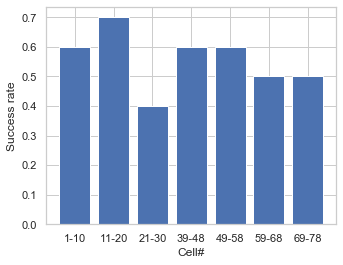

In [42]:
# plt.figure(figsize=[6,4])
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.figure(figsize=[5.2,4])
sns.set()
sns.set_style(style='whitegrid')
plt.bar(x, success_rate)
plt.xlabel('Cell#', size = 12)
plt.ylabel('Success rate', size = 12)
plt.savefig('/Users/zhengj10/Desktop/pp_1p_2d_sr.pdf',format='pdf')
plt.show()


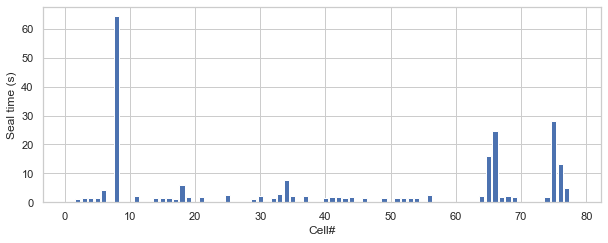

In [50]:

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


plt.figure(figsize=[10,3.6])
# plt.bar(np.arange(1,41), df_2p.Seal_time.iloc[:40])


plt.bar(np.arange(1,79), df_1p.Seal_time.iloc[:78])
plt.xlabel('Cell#', size = 12)
plt.ylabel('Seal time (s)', size = 12)
plt.savefig('/Users/zhengj10/Desktop/pp_1p_2d_st.pdf',format='pdf')
plt.show()


### Throughput estimate

In [44]:
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw'
rawPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw'
os.path.exists(imgPath)


True

In [45]:
datePath = ['2020.02.20_000']
datePath


['2020.02.20_000']

In [46]:
data_all={}
columns = ['Date','Plate','Well','Cell','Mutation','Transfected_date','Time_stamp','Success']
df = pd.DataFrame(columns = columns)
df


,Date,Plate,Well,Cell,Mutation,Transfected_date,Time_stamp,Success


In [47]:
for param in(df.columns):
    data_all[param] = []

In [48]:
for date in datePath:
    platePath = pb.getPathInfo(os.path.join(imgPath, date))
    for plate in platePath:

        idxFile = os.path.join(imgPath, date, plate, '.index')
        a = yaml.load(open(idxFile), Loader=yaml.FullLoader)
        mutation = a['.']['mutation_1']
        note = a['.']['notes'][0:6]
        cellPath = pb.getPathInfo(os.path.join(rawPath, date, plate))
        for cell in(cellPath):
            idxFile = os.path.join(rawPath, date, plate, cell, '.index')
            a = yaml.load(open(idxFile), Loader=yaml.FullLoader)
            time_stamp = a['.']['__timestamp__']
            
            data_all['Date'].append(date)
            data_all['Plate'].append(plate)
            data_all['Well'].append('well_1')
            data_all['Cell'].append(cell)
            data_all['Mutation'].append(mutation)
            data_all['Transfected_date'].append(note[:6])
            data_all['Time_stamp'].append(time_stamp)
            if os.path.exists(os.path.join(rawPath, date, plate, cell, 'camera_clamp1_000')):
                data_all['Success'].append(1)
            else:
                data_all['Success'].append(0)
            
print('Done!')

Done!


In [49]:
df = pd.DataFrame(data_all, columns = list(df))
df

,Date,Plate,Well,Cell,Mutation,Transfected_date,Time_stamp,Success
0,2020.02.20_000,plate_000,well_1,patch_attempt_0000_000,ASAP3b.T392V.A,200212,1.582207e+09,1
1,2020.02.20_000,plate_000,well_1,patch_attempt_0001_000,ASAP3b.T392V.A,200212,1.582207e+09,1
2,2020.02.20_000,plate_000,well_1,patch_attempt_0002_000,ASAP3b.T392V.A,200212,1.582208e+09,1
3,2020.02.20_000,plate_000,well_1,patch_attempt_0003_000,ASAP3b.T392V.A,200212,1.582208e+09,1
4,2020.02.20_000,plate_000,well_1,patch_attempt_0004_000,ASAP3b.T392V.A,200212,1.582208e+09,1
...,...,...,...,...,...,...,...,...
98,2020.02.20_000,plate_009,well_1,patch_attempt_0030_000,ASAP3b.T392V.J,200212,1.582240e+09,1
99,2020.02.20_000,plate_009,well_1,patch_attempt_0031_000,ASAP3b.T392V.J,200212,1.582240e+09,1
100,2020.02.20_000,plate_009,well_1,patch_attempt_0032_000,ASAP3b.T392V.J,200212,1.582241e+09,1
101,2020.02.20_000,plate_009,well_1,patch_attempt_0033_000,ASAP3b.T392V.J,200212,1.582241e+09,1


In [50]:
success = []
failed = []
time_per_plate = []
for plate in platePath:
    df_plate = df[df.Plate == plate]
    df_plate = df_plate.sort_values(by=['Time_stamp'])
    success.append(np.sum(df_plate.Success))
    failed.append(len(df_plate) - np.sum(df_plate.Success))
    time_per_plate.append(df_plate.Time_stamp.tolist()[-1]-df_plate.Time_stamp.tolist()[0])


In [51]:
success_cum = np.cumsum(success)
failed_cum = np.cumsum(failed)
time_per_plate_cum = np.cumsum(time_per_plate)/3600

In [52]:
time_per_plate_cum

array([0.31598444, 0.88799083, 1.40971972, 1.82283972, 2.27327806,
       2.85444917, 3.23350361, 3.78684639, 4.19732   , 5.00392861])

In [53]:
time_per_plate_cum = np.array(time_per_plate)/3600

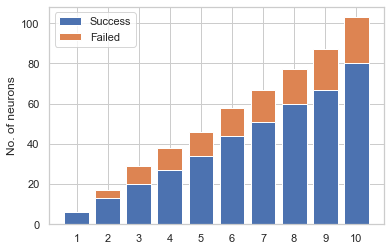

In [54]:
sns.set()
sns.set_style(style='whitegrid')
N = len(df.Plate.unique())
ind = np.arange(1,N+1)
# p1 = plt.bar(ind, success)
# p2 = plt.bar(ind, failed,bottom=success)
p1 = plt.bar(ind, success_cum)
p2 = plt.bar(ind, failed_cum,bottom=success_cum)
# plt.xlabel('Plate#',size=12)
plt.ylabel('No. of neurons',size=12)
plt.title('')
plt.xticks(ind, ind)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Success', 'Failed'))
# plt.savefig('/Users/zhengj10/Desktop/throughput.png',dpi=1200)
# plt.savefig('/Users/zhengj10/Desktop/throughput_cum.png',dpi=1200)
plt.show()


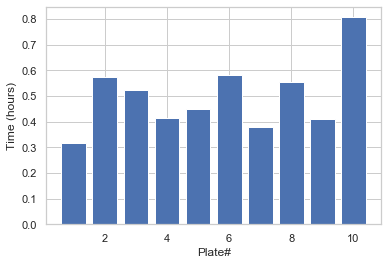

In [55]:
p1 = plt.bar(ind, time_per_plate_cum)
plt.xlabel('Plate#',size=12)
plt.ylabel('Time (hours)',size=12)
# plt.savefig('/Users/zhengj10/Desktop/speed.png',dpi=1200)
# plt.savefig('/Users/zhengj10/Desktop/speed_cum.png',dpi=1200)
plt.show()


In [60]:
np.sum(time_per_plate_cum)

5.003928611013625

In [ ]:
df = df.sort_values(by=['Time_stamp'])
actual_time = df.Time_stamp.tolist()[-1]-df.Time_stamp.tolist()[0]
actual_time/=3600
actual_time

### Data quality evaluation

In [ ]:
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/data_quanlity_evaluation'
os.path.exists(imgPath)


In [ ]:
data_all={}
columns = ['Date','Plate','Well','Cell','Mutation','Transfected_date','Time_stamp','Leak','Ra','Leaks_0','Ra_0']
df = pd.DataFrame(columns = columns)
df


In [ ]:
# datePath = ['2020.02.20_000']
datePath = pb.getPathInfo(imgPath)
datePath

In [ ]:
for param in(df.columns):
    data_all[param] = []

for date in datePath:

    platePath = pb.getPathInfo(os.path.join(imgPath, date))
    for plate in platePath:

        print(os.path.join(imgPath, date, plate))
        idxFile = os.path.join(imgPath, date, plate, '.index')
        a = yaml.load(open(idxFile), Loader=yaml.FullLoader)
        mutation = a['.']['mutation_1']
        note = a['.']['notes'][0:6]
        correction = a['.']['__timestamp__']
        cellPath = pb.getPathInfo(os.path.join(imgPath, date, plate))
        for cell in(cellPath):

            if not os.path.exists(os.path.join(imgPath, date, plate, cell, 'camera_clamp1_000')):
                continue
            idxFile = os.path.join(imgPath, date, plate, cell, '.index')
            a = yaml.load(open(idxFile), Loader=yaml.FullLoader)
            time_stamp = (a['.']['__timestamp__']-correction)/60


            data_all['Date'].append(date)
            data_all['Plate'].append(plate)
            data_all['Well'].append('well_1')
            data_all['Cell'].append(cell)
            data_all['Mutation'].append(mutation)
            data_all['Transfected_date'].append(note)
            data_all['Time_stamp'].append(time_stamp)
            leaks = []
            Ra_s = []

            for i in range(9):
                if cell == 'patch_attempt_0044_000':
                    print(i)
                ivFile = os.path.join(imgPath, date, plate, cell) + '/camera_clamp1_000/' + str(i).zfill(3) + '/Clamp1.ma'
#                 if not os.path.exists(ivFile):
#                     break
                leak = pb.get_leak(ivFile)
                Ra = pb.get_Ra(ivFile,i)
                leaks.append(leak)
                Ra_s.append(Ra)
            data_all['Leak'].append(leaks)
            data_all['Ra'].append(Ra_s)
            data_all['Leaks_0'].append(leaks[0])
            data_all['Ra_0'].append(Ra_s[0])

print('Done!')


In [ ]:
df = pd.read_pickle('/Users/zhengj10/Desktop/data_quality_eval.pkl')
# df

In [ ]:
Ra_max = []
Leak_min = []

for i,r in df.iterrows():
    max_Ra = np.max(df.loc[i,'Ra'])
    Ra_max.append(max_Ra)
    min_Leak = np.min(df.loc[i,'Leak'])
    Leak_min.append(min_Leak)
    
df['Ra_max'] = Ra_max
df['Leak_min'] = Leak_min
df

In [ ]:
### The following code remove string format of list
# import ast
# Ra_new = []
# Leak_new = []
# for i,r in df.iterrows():
#     Ra_list = ast.literal_eval(df.loc[i,'Ra'])
#     Ra_new.append(Ra_list)
#     Leak_list = ast.literal_eval(df.loc[i,'Leak'])
#     Leak_new.append(Leak_list)
# df['Ra_new'] = Ra_new
# df['Leak_new'] = Leak_new
# df

In [ ]:
# df.drop(columns=['Leak', 'Ra'],inplace=True)
# df.rename(columns = {'Leak_new':'Leak','Ra_new':'Ra'},inplace=True)
# df

In [ ]:
# df.to_excel('/Users/zhengj10/Desktop/data_quality_eval.xlsx')
# df.to_pickle('/Users/zhengj10/Desktop/data_quality_eval.pkl')

In [ ]:
threshold = {
            'Leak_min':-100,
            'Ra_max':30,
            'Time':1
              }


In [ ]:
df_sel = df[(df.Leak_min>threshold['Leak_min'])&(df.Ra_max<threshold['Ra_max'])&(df.Time_stamp>threshold['Time'])]
print(len(df))
print(len(df_sel))


In [ ]:
df_sel = df_sel.copy() # This step is to remove the SettingwithCopyWarning
df_sel['Ra (M\u03A9)'] = df_sel['Ra_0'] # Duplicate Ra column with greek letter for column name (for plotting purpose)


In [ ]:
fig = plt.figure(figsize=[12,5])
sns.set_style(style='whitegrid')
ax1  = fig.add_subplot(121)
ax2  = fig.add_subplot(122)
s_scatter_1 = sns.scatterplot(x='Time_stamp', y='Leaks_0',data=df_sel,hue='Mutation',ax = ax1, s=100)
s_scatter_2 = sns.scatterplot(x='Time_stamp', y='Ra_0',data=df_sel,hue='Mutation',ax = ax2, s=100)
ax1.get_legend().remove()
ax1.set_ylabel('Holding current (pA)',size=12)
ax1.set_xlabel('Time in buffer (min)',size=12)
ax2.set_ylabel('Ra (M\u03A9)',size=12)
ax2.set_xlabel('Time_in_bufer (min)',size=12)
legend = ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# legend.get_title().set_fontsize(16)
# plt.setp(ax2.get_legend().get_texts(), fontsize='22')
# plt.setp(ax2.get_legend().get_title(), fontsize='32')
# plt.legend(fontsize='large', title_fontsize='40')
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/Leak_Ra.png', dpi=1200)

plt.show()


In [ ]:
fig = plt.figure(figsize=[10.5,8])
sns.set_style(style='whitegrid')
ax  = fig.add_subplot(111)
s_scatter_1 = sns.scatterplot(x='Time_stamp', y='Leaks_0', data=df_sel,hue='Mutation', ax = ax,
                              size='Ra (M\u03A9)', sizes=(50,300))
ax.get_legend().remove()
ax.set_ylabel('Holding current (pA)',size=14)
ax.set_xlabel('Time_in_buffer (min)',size=14)
# ax.legend(handles=handles[1:], labels=labels[1:],loc='center left', bbox_to_anchor=(1.08, 0.6))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.6))
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/Leak_Ra_one_plot.png', dpi=1200)
plt.show()


- Fluctuation of leak and Ra

In [ ]:
sns.set_style(style='whitegrid')

fig = plt.figure(figsize=[8,6])
params = ['Leak','Ra']
f0_mean = []
f0_sem = []
x = np.linspace(-100,60,9)
for i in range(len(params)):
    ax = plt.subplot(1,2,i+1)
    data = np.array(df_sel[params[i]].tolist())
    
#     data = data.transpose()
    for c in range(data.shape[0]):
        
        if i == 0:
            ax.plot(x,data[c,:],'o-',markersize=12,alpha=0.3)
            ax.set_ylabel('Holding current (pA)', size =12)
#             ax.set_ylim([-150,20])
        else:
            ax.plot(x,data[c,:],'o-',markersize=12,alpha=0.3)
            ax.set_ylabel('Ra (M\u03A9)', size =12)
        ax.set_xlabel('mV', size =12)
        ax.set_xticks(x)
#             ax.set_ylim([5,35])
    #     plt.ylim([5,40])
ax.set_xticks(x)
#     ax.errorbar(x, param_mean, yerr = param_sem, fmt = 'o-')
#     ax.set_xlabel('mV',size=12)
#     if i==0:
#         ax.set_ylabel('Holding current (pA)',size=12)
#     else:
#         ax.set_ylabel('Ra (M\u03A9)',size=12)
plt.tight_layout()

# fig.savefig('/Users/zhengj10/Desktop/Leak_Ra_fluctuation_individual.png',dpi=1200)
plt.show()


In [ ]:
sns.set_style(style='whitegrid')

fig = plt.figure(figsize=[5,4])
params = ['Leak','Ra']
f0_mean = []
f0_sem = []
x = np.linspace(-100,60,9)
for i in range(len(params)):
    ax = plt.subplot(2,1,i+1)
    
    param_mean = np.mean(df_sel[params[i]].tolist(),axis=0)
    param_sem = np.std(df_sel[params[i]].tolist(),axis=0)/(len(df)-1)
    f0_mean.append(param_mean)
    f0_sem.append(param_sem)
    ax.errorbar(x, param_mean, yerr = param_sem, fmt = 'o-')
    ax.set_xlabel('mV',size=12)
    if i==0:
        ax.set_ylabel('Holding current (pA)',size=12)
    else:
        ax.set_ylabel('Ra (M\u03A9)',size=12)
    ax.set_xticks(x)
plt.tight_layout()

# fig.savefig('/Users/zhengj10/Desktop/Leak_Ra_fluctuation_stack.png',dpi=1200)
plt.show()


In [ ]:
np.mean(df_sel[params[i]].tolist(),axis=0)

### Power density measurement

In [ ]:
# percent_max = [20,50,80] # Teal channel
percent_max = [10,20,30] # Cyan channel
power_density_teal = [5.095541401,10.82802548,15.2866242]
power_density_cyan = [14.96815287,27.70700637,39.49044586]


In [ ]:
sns.set_style(style='whitegrid')
plt.plot(percent_max,power_density_teal)
plt.xlabel('%max', size = 12)
plt.ylabel('mW/mm2', size = 12)
# plt.savefig('/Users/zhengj10/Desktop/power_density_teal.png')
plt.show()


In [ ]:
plt.plot(percent_max,power_density_cyan)
plt.xlabel('%max', size = 12)
plt.ylabel('mW/mm2', size = 12)
# plt.savefig('/Users/zhengj10/Desktop/power_density_cyan.png')
plt.show()


In [ ]:

26

>>> import matplotlib.pyplot as plt
>>> a = [1,3,5,7]
>>> b = [11,-2,4,19]
>>> plt.pyplot.scatter(a,b)
>>> plt.scatter(a,b)
<matplotlib.collections.PathCollection object at 0x00000000057E2CF8>
>>> plt.show()
>>> c = [1,3,2,1]
>>> plt.errorbar(a,b,yerr=c, linestyle="None")
<Container object of 3 artists>
>>> plt.show()
